# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count',
                  'synonyms_count', 'orthographic_density']
N_COMPONENTS = 3
BIN_COUNT = 4

Imports and database setup.

In [2]:
from itertools import product

import pandas as pd
import seaborn as sb
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.majority, past=Past.all, durl=Durl.exclude_past, max_distance=1)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id)\
        .filter(Substitution.model == model)
    print("Got {} substitutions for model {}"
          .format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = \
                substitution.features(feature, sentence_relative='median')
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'feature': feature,
                'source': source,
                'source_rel': source_rel,
                'destination': destination,
                'destination_rel': destination_rel,
                'h0': substitution.feature_average(feature),
                'h0_rel': substitution.feature_average(
                        feature, sentence_relative='median'),
                'h0n': substitution.feature_average(
                        feature, source_synonyms=True),
                'h0n_rel': substitution.feature_average(
                        feature, source_synonyms=True,
                        sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 1339 substitutions for model Model(time=Time.continuous, source=Source.majority, past=Past.all, durl=Durl.exclude_past, max_distance=1)


  0% (   0 of 1339) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   8 of 1339) |                       | Elapsed Time: 0:00:25 ETA: 1:10:10

  1% (  24 of 1339) |                       | Elapsed Time: 0:00:25 ETA: 0:23:20

  3% (  41 of 1339) |                       | Elapsed Time: 0:00:25 ETA: 0:13:36

  4% (  58 of 1339) |                       | Elapsed Time: 0:00:26 ETA: 0:09:35

  5% (  74 of 1339) |#                      | Elapsed Time: 0:00:26 ETA: 0:00:18

  6% (  91 of 1339) |#                      | Elapsed Time: 0:00:26 ETA: 0:00:18

  8% ( 108 of 1339) |#                      | Elapsed Time: 0:00:26 ETA: 0:00:18

  9% ( 125 of 1339) |##                     | Elapsed Time: 0:00:27 ETA: 0:00:18

 10% ( 141 of 1339) |##                     | Elapsed Time: 0:00:27 ETA: 0:00:18

 11% ( 158 of 1339) |##                     | Elapsed Time: 0:00:27 ETA: 0:00:17

 13% ( 175 of 1339) |###                    | Elapsed Time: 0:00:27 ETA: 0:00:17

 14% ( 192 of 1339) |###                    | Elapsed Time: 0:00:28 ETA: 0:00:17

 15% ( 208 of 1339) |###                    | Elapsed Time: 0:00:28 ETA: 0:00:17

 16% ( 225 of 1339) |###                    | Elapsed Time: 0:00:28 ETA: 0:00:17

 18% ( 242 of 1339) |####                   | Elapsed Time: 0:00:28 ETA: 0:00:17

 19% ( 259 of 1339) |####                   | Elapsed Time: 0:00:29 ETA: 0:00:16

 20% ( 275 of 1339) |####                   | Elapsed Time: 0:00:29 ETA: 0:00:15

 21% ( 292 of 1339) |#####                  | Elapsed Time: 0:00:29 ETA: 0:00:15

 23% ( 309 of 1339) |#####                  | Elapsed Time: 0:00:29 ETA: 0:00:15

 24% ( 326 of 1339) |#####                  | Elapsed Time: 0:00:30 ETA: 0:00:15

 25% ( 342 of 1339) |#####                  | Elapsed Time: 0:00:30 ETA: 0:00:15

 26% ( 359 of 1339) |######                 | Elapsed Time: 0:00:30 ETA: 0:00:14

 28% ( 376 of 1339) |######                 | Elapsed Time: 0:00:30 ETA: 0:00:14

 29% ( 393 of 1339) |######                 | Elapsed Time: 0:00:31 ETA: 0:00:14

 30% ( 409 of 1339) |#######                | Elapsed Time: 0:00:31 ETA: 0:00:13

 31% ( 426 of 1339) |#######                | Elapsed Time: 0:00:31 ETA: 0:00:13

 33% ( 444 of 1339) |#######                | Elapsed Time: 0:00:31 ETA: 0:00:13

 34% ( 459 of 1339) |#######                | Elapsed Time: 0:00:32 ETA: 0:00:13

 35% ( 476 of 1339) |########               | Elapsed Time: 0:00:32 ETA: 0:00:13

 36% ( 493 of 1339) |########               | Elapsed Time: 0:00:32 ETA: 0:00:12

 38% ( 511 of 1339) |########               | Elapsed Time: 0:00:32 ETA: 0:00:12

 39% ( 526 of 1339) |#########              | Elapsed Time: 0:00:33 ETA: 0:00:12

 40% ( 543 of 1339) |#########              | Elapsed Time: 0:00:33 ETA: 0:00:12

 41% ( 560 of 1339) |#########              | Elapsed Time: 0:00:33 ETA: 0:00:11

 43% ( 577 of 1339) |#########              | Elapsed Time: 0:00:33 ETA: 0:00:11

 44% ( 593 of 1339) |##########             | Elapsed Time: 0:00:34 ETA: 0:00:11

 45% ( 610 of 1339) |##########             | Elapsed Time: 0:00:34 ETA: 0:00:11

 46% ( 627 of 1339) |##########             | Elapsed Time: 0:00:34 ETA: 0:00:10

 48% ( 645 of 1339) |###########            | Elapsed Time: 0:00:34 ETA: 0:00:10

 49% ( 660 of 1339) |###########            | Elapsed Time: 0:00:35 ETA: 0:00:10

 50% ( 677 of 1339) |###########            | Elapsed Time: 0:00:35 ETA: 0:00:09

 51% ( 694 of 1339) |###########            | Elapsed Time: 0:00:35 ETA: 0:00:09

 53% ( 710 of 1339) |############           | Elapsed Time: 0:00:35 ETA: 0:00:09

 54% ( 727 of 1339) |############           | Elapsed Time: 0:00:36 ETA: 0:00:09

 55% ( 744 of 1339) |############           | Elapsed Time: 0:00:36 ETA: 0:00:08

 56% ( 760 of 1339) |#############          | Elapsed Time: 0:00:36 ETA: 0:00:08

 58% ( 777 of 1339) |#############          | Elapsed Time: 0:00:36 ETA: 0:00:08

 59% ( 794 of 1339) |#############          | Elapsed Time: 0:00:37 ETA: 0:00:08

 60% ( 811 of 1339) |#############          | Elapsed Time: 0:00:37 ETA: 0:00:07

 61% ( 828 of 1339) |##############         | Elapsed Time: 0:00:37 ETA: 0:00:07

 63% ( 844 of 1339) |##############         | Elapsed Time: 0:00:37 ETA: 0:00:07

 64% ( 861 of 1339) |##############         | Elapsed Time: 0:00:38 ETA: 0:00:07

 65% ( 878 of 1339) |###############        | Elapsed Time: 0:00:38 ETA: 0:00:06

 66% ( 895 of 1339) |###############        | Elapsed Time: 0:00:38 ETA: 0:00:06

 68% ( 911 of 1339) |###############        | Elapsed Time: 0:00:38 ETA: 0:00:06

 69% ( 928 of 1339) |###############        | Elapsed Time: 0:00:39 ETA: 0:00:06

 70% ( 945 of 1339) |################       | Elapsed Time: 0:00:39 ETA: 0:00:06

 71% ( 962 of 1339) |################       | Elapsed Time: 0:00:39 ETA: 0:00:05

 73% ( 978 of 1339) |################       | Elapsed Time: 0:00:39 ETA: 0:00:05

 74% ( 995 of 1339) |#################      | Elapsed Time: 0:00:40 ETA: 0:00:05

 75% (1012 of 1339) |#################      | Elapsed Time: 0:00:40 ETA: 0:00:04

 76% (1028 of 1339) |#################      | Elapsed Time: 0:00:40 ETA: 0:00:04

 78% (1046 of 1339) |#################      | Elapsed Time: 0:00:41 ETA: 0:00:04

 79% (1062 of 1339) |##################     | Elapsed Time: 0:00:41 ETA: 0:00:04

 80% (1080 of 1339) |##################     | Elapsed Time: 0:00:41 ETA: 0:00:03

 81% (1095 of 1339) |##################     | Elapsed Time: 0:00:41 ETA: 0:00:03

 83% (1113 of 1339) |###################    | Elapsed Time: 0:00:41 ETA: 0:00:03

 84% (1129 of 1339) |###################    | Elapsed Time: 0:00:42 ETA: 0:00:03

 85% (1146 of 1339) |###################    | Elapsed Time: 0:00:42 ETA: 0:00:02

 86% (1162 of 1339) |###################    | Elapsed Time: 0:00:42 ETA: 0:00:02

 88% (1179 of 1339) |####################   | Elapsed Time: 0:00:42 ETA: 0:00:02

 89% (1196 of 1339) |####################   | Elapsed Time: 0:00:43 ETA: 0:00:02

 90% (1213 of 1339) |####################   | Elapsed Time: 0:00:43 ETA: 0:00:01

 91% (1229 of 1339) |#####################  | Elapsed Time: 0:00:43 ETA: 0:00:01

 93% (1246 of 1339) |#####################  | Elapsed Time: 0:00:44 ETA: 0:00:01

 94% (1263 of 1339) |#####################  | Elapsed Time: 0:00:44 ETA: 0:00:01

 95% (1280 of 1339) |#####################  | Elapsed Time: 0:00:44 ETA: 0:00:00

 96% (1296 of 1339) |###################### | Elapsed Time: 0:00:44 ETA: 0:00:00

 98% (1313 of 1339) |###################### | Elapsed Time: 0:00:45 ETA: 0:00:00

 99% (1330 of 1339) |###################### | Elapsed Time: 0:00:45 ETA: 0:00:00

100% (1339 of 1339) |######################| Elapsed Time: 0:00:45 Time: 0:00:45


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'feature'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

Prepare feature ordering.

In [5]:
ordered_features = sorted(
    Substitution.__features__,
    key=lambda f: Substitution._transformed_feature(f).__doc__
)

### What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the average feature of an appearing word upon substitution, as a function of the feature of the disappearing word:
$$\nu_{\phi}(f) = \left< \phi(w') \right>_{\{w \rightarrow w' | \phi(w) = f \}}$$
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the average sentence-relative feature of an appearing word upon substitution as a function of the sentence-relative feature of the disappearing word, i.e. $\phi($destination$) - \phi($destination sentence$)$ as a function of $\phi($source$) - \phi($source sentence$)$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted with fixed-width bins, then quantile bins, with absolute feature values, then with relative-to-sentence features.

In [6]:
def print_significance(name, bins, h0, h0n, values):
    bin_count = bins.max() + 1
    print()
    print('-' * len(name))
    print(name)
    print('-' * len(name))
    header = ('Bin  |   '
              + ' |   '.join(map(str, range(1, bin_count + 1)))
              + ' |')
    print(header)
    print('-' * len(header))
    
    for null_name, nulls in [('H_0 ', h0), ('H_00', h0n)]:
        bin_values = np.zeros(bin_count)
        bin_nulls = np.zeros(bin_count)
        cis = np.zeros((bin_count, 3))

        for i in range(bin_count):
            indices = bins == i
            n = (indices).sum()
            s = values[indices].std(ddof=1)

            bin_values[i] = values[indices].mean()
            bin_nulls[i] = nulls[indices].mean()
            for j, alpha in enumerate([.05, .01, .001]):
                cis[i, j] = (stats.t.ppf(1 - alpha/2, n - 1)
                             * values[indices].std(ddof=1)
                             / np.sqrt(n - 1))

        print(null_name + ' |', end='')
        differences = ((bin_values[:,np.newaxis]
                        < bin_nulls[:,np.newaxis] - cis)
                       | (bin_values[:,np.newaxis]
                          > bin_nulls[:,np.newaxis] + cis))
        for i in range(bin_count):
            if differences[i].any():
                n_stars = np.where(differences[i])[0].max()
                bin_stars = '*' * (1 + n_stars) + ' ' * (2 - n_stars)
            else:
                bin_stars = 'ns.'
            print(' ' + bin_stars + ' |', end='')
        print()

In [7]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    quantiles = kwargs.get('quantiles', False)
    feature_field = kwargs.get('feature_field', 'feature')
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color,
             label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.',
             color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted',
             color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

    # Test for statistical significance
    print_significance(str(data.iloc[0][feature_field]),
                       x_bins, h0, h0n, y)

In [8]:
def plot_grid(data, features, filename,
              plot_function, xlabel, ylabel,
              feature_field='feature', plot_kws={}):
    g = sb.FacetGrid(data=data[data[feature_field]
                               .map(lambda f: f in features)],
                     sharex=False, sharey=False,
                     col=feature_field, hue=feature_field,
                     col_order=features, hue_order=features,
                     col_wrap=3, aspect=1.5, size=3)
    g.map_dataframe(plot_function, **plot_kws)
    g.set_titles('{col_name}')
    g.set_xlabels(xlabel)
    g.set_ylabels(ylabel)
    for ax in g.axes.ravel():
        legend = ax.legend(frameon=True, loc='best')
        if not legend:
            # Skip if nothing was plotted on these axes.
            continue
        frame = legend.get_frame()
        frame.set_facecolor('#f2f2f2')
        frame.set_edgecolor('#000000')
        ax.set_title(Substitution._transformed_feature(ax.get_title())
                     .__doc__)
    if SAVE_FIGURES:
        g.fig.savefig(settings.FIGURE.format(filename),
                      bbox_inches='tight', dpi=300)

In [9]:
def plot_bias(ax, data, color, ci=True, relative=False, quantiles=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count),
            (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale,
                        (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

In [10]:
def plot_overlay(data, features, filename, palette_name,
                 plot_function, title, xlabel, ylabel, plot_kws={}):
    palette = sb.color_palette(palette_name, len(features))
    fig, ax = plt.subplots(figsize=(12, 6))
    for j, feature in enumerate(features):
        plot_function(ax, data[data.feature == feature].dropna(),
                      color=palette[j], **plot_kws)
    ax.legend(loc='lower right')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if SAVE_FIGURES:
        fig.savefig(settings.FIGURE.format(filename),
                    bbox_inches='tight', dpi=300)
    return ax

### 2.1 Global feature values

#### 2.1.1 Bins of distribution of appeared global feature values

For each feature $\phi$, we plot the variation upon substitution as explained above


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |
H_00 | *** | *** | *** | *   |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | *   |
H_00 | ns. | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | ns. |
H_00 | **  | ns. | ns. | ns. |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | ns. | *   |
H_00 | ns. | *** | *** | *** |



-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | ns. | ns. | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | **  | *** | *** | ns. |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | *** |
H_00 | ns. | ns. | *** | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | **  |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | ns. | ns. | *   |


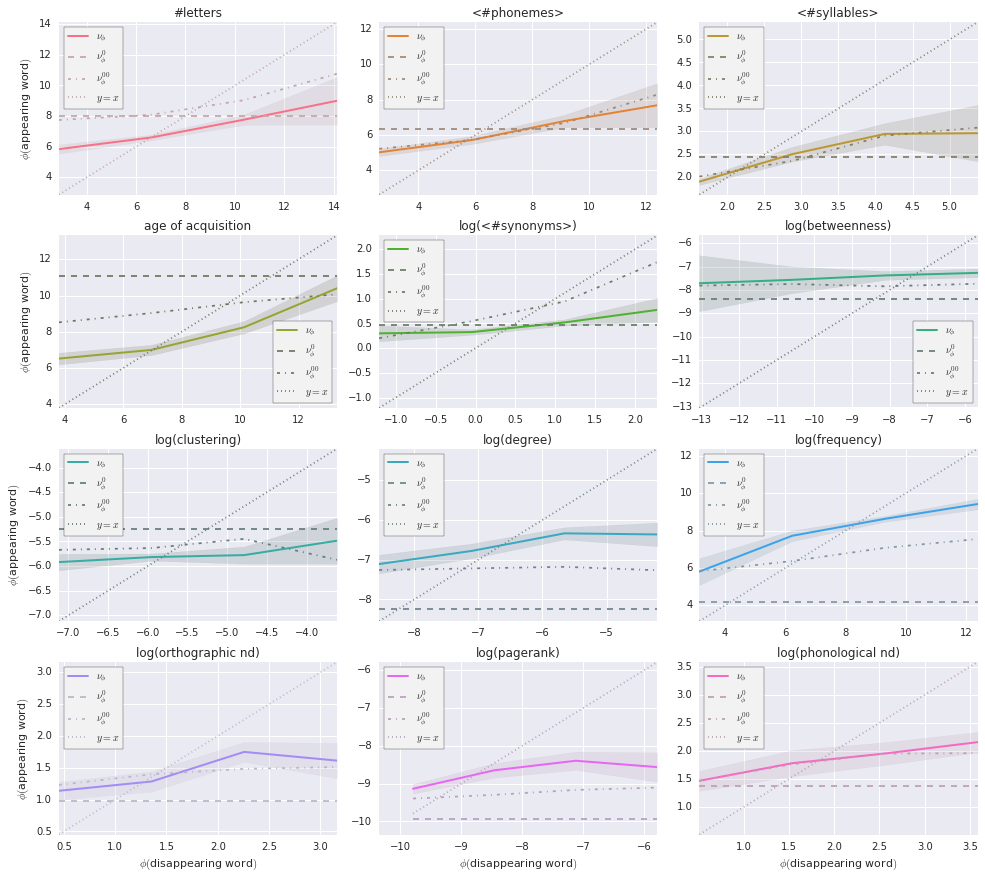

In [11]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

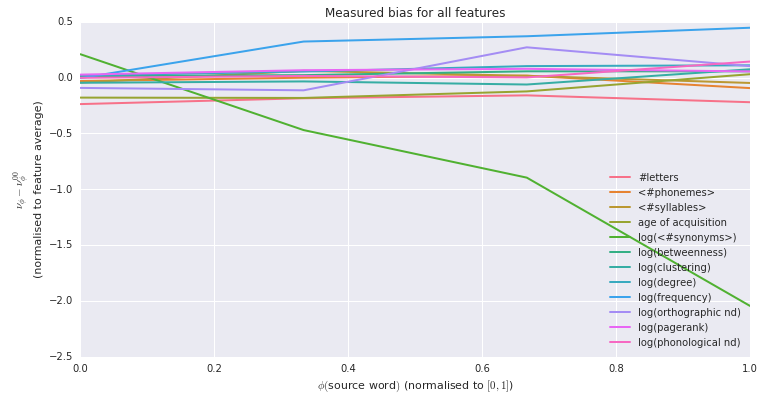

In [12]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |



----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | **  | *** | *** | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |
H_00 | *** | *** | *** | *   |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | ns. | *   |
H_00 | ns. | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | *** |
H_00 | ns. | ns. | *** | ns. |


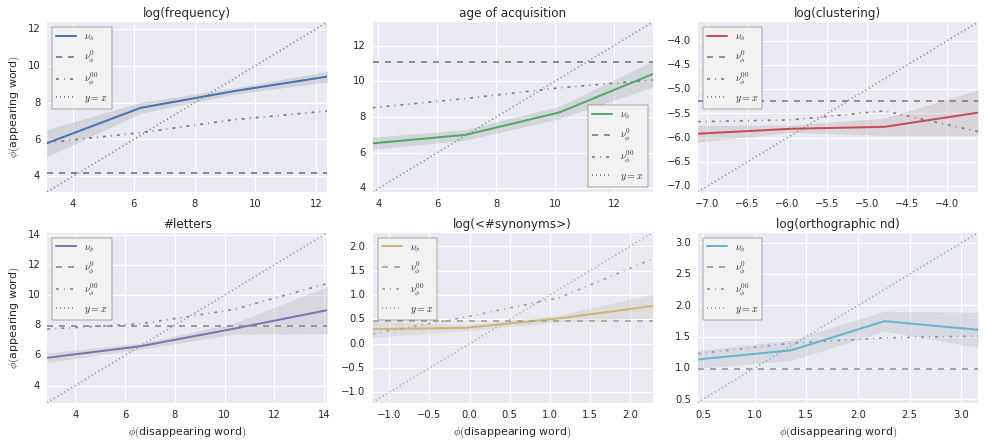

In [13]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

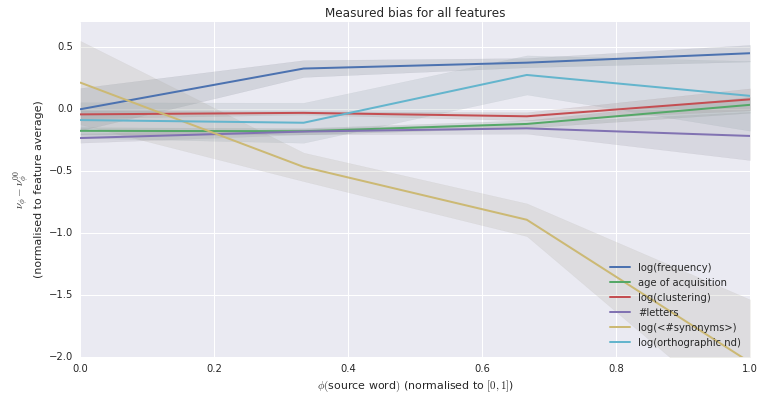

In [14]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)')\
    .set_ylim(-2, .7);

#### 2.1.2 Quantiles of distribution of appeared global feature values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | **  |
H_00 | ns. | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |
------------------
H_0  | *** | **  |
H_00 | **  | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | ns. | **  |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | **  |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | **  | **  |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *   | *** | *** | *** |
H_00 | ns. | ns. | ns. | **  |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |



--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | ns. | ns. | *   |


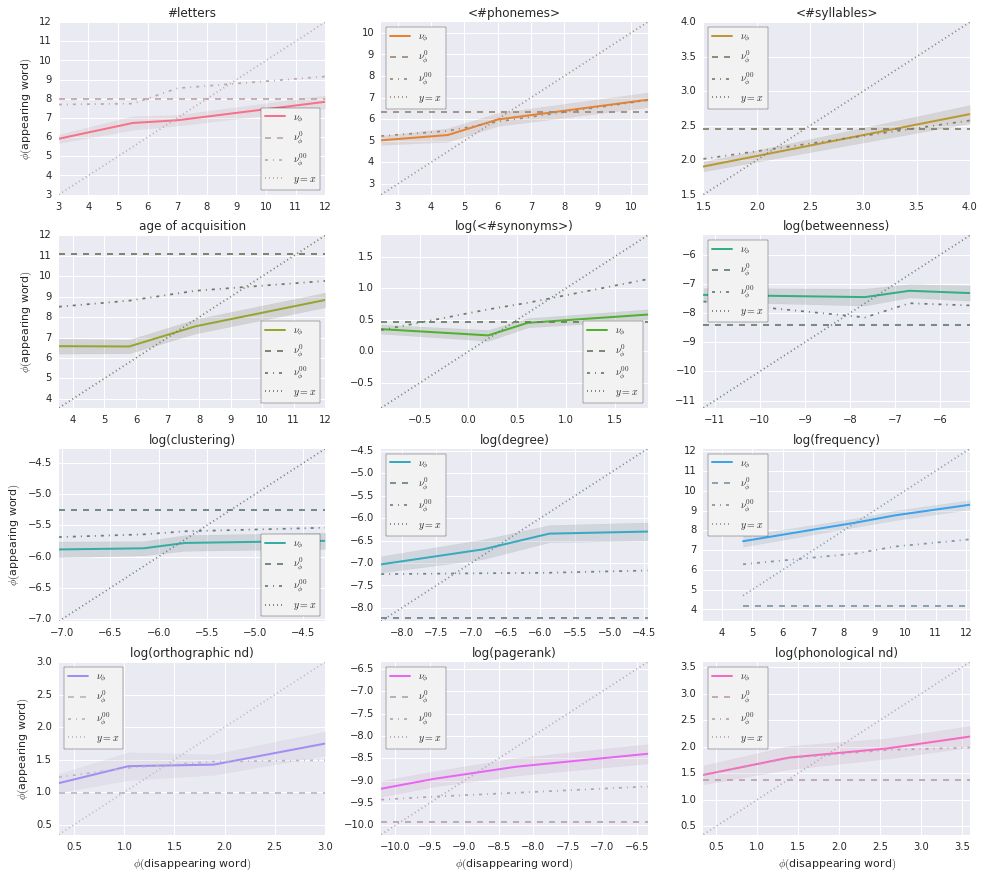

In [15]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

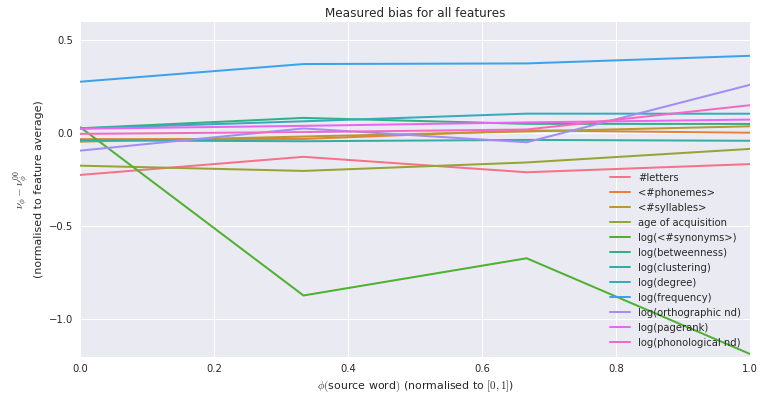

In [16]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |



----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | **  | **  |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | ns. | **  |
H_00 | ns. | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | *** |
H_00 | ns. | ns. | ns. | **  |


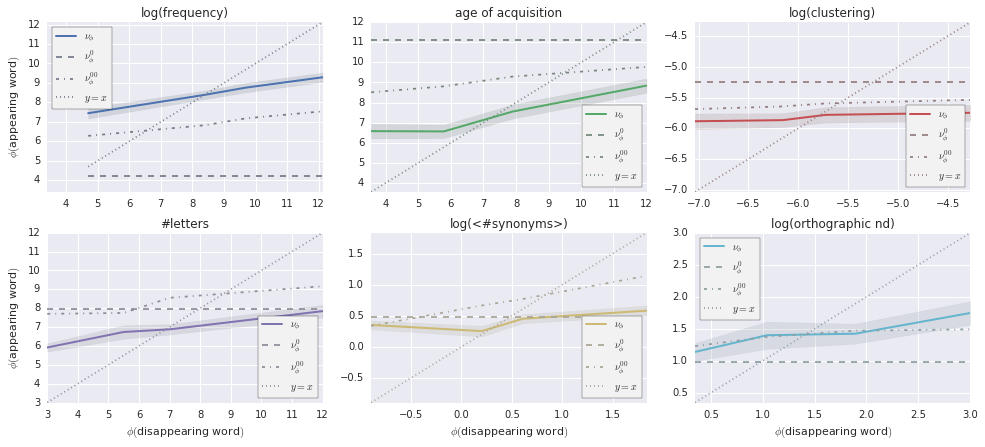

In [17]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

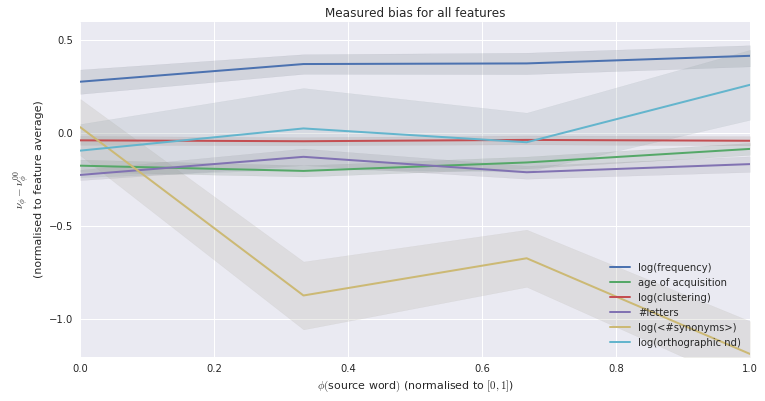

In [18]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'quantiles': True})\
    .set_ylim(-1.2, .6);

### 2.2 Sentence-relative feature values

#### 2.2.1 Bins of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |
H_00 | ns. | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | **  | ns. |
H_00 | ns. | *   | ns. | ns. |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | **  | **  | ns. |
H_00 | ns. | *** | *** | **  |



-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | *   | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *   | **  | *** | ns. |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | **  | *** | **  |
H_00 | ns. | *   | ns. | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | **  |



--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | ns. | ns. | ns. |


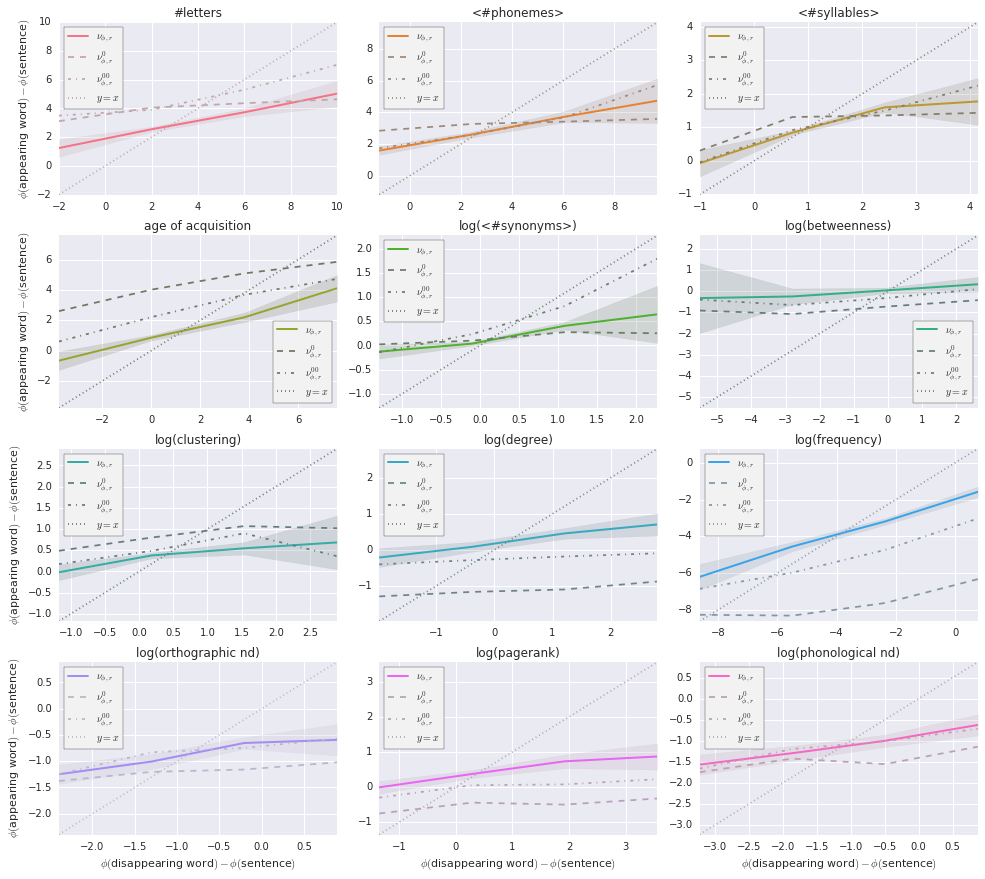

In [19]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

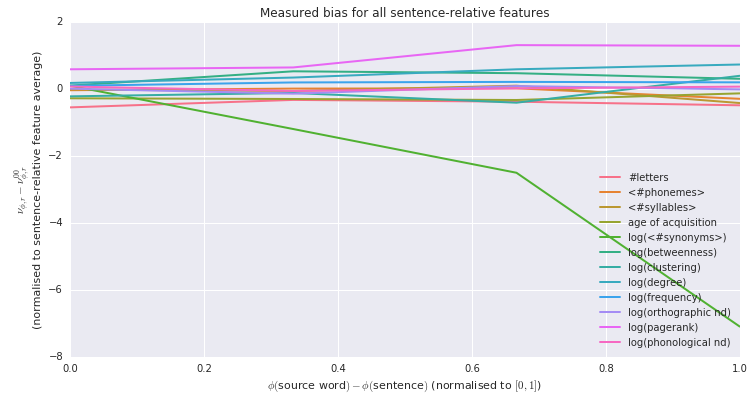

In [20]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |



----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *   | **  | *** | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | **  | **  | ns. |
H_00 | ns. | *** | *** | **  |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | **  |
H_00 | ns. | *   | ns. | ns. |


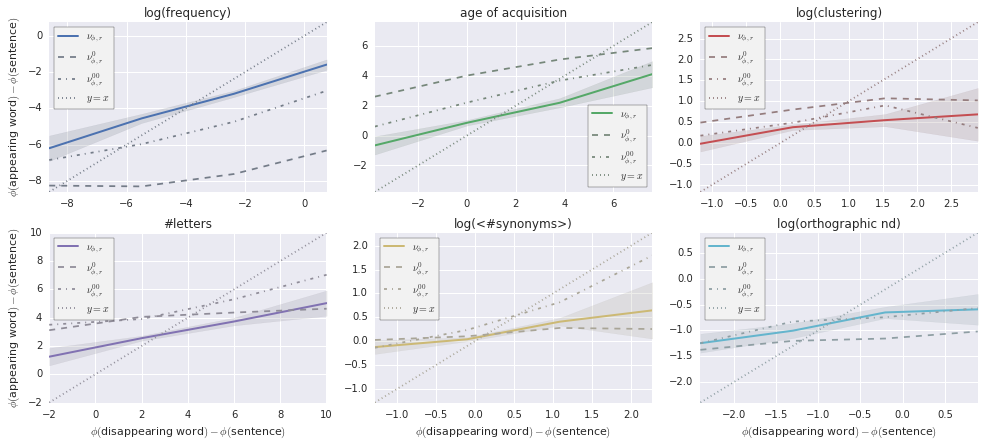

In [21]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

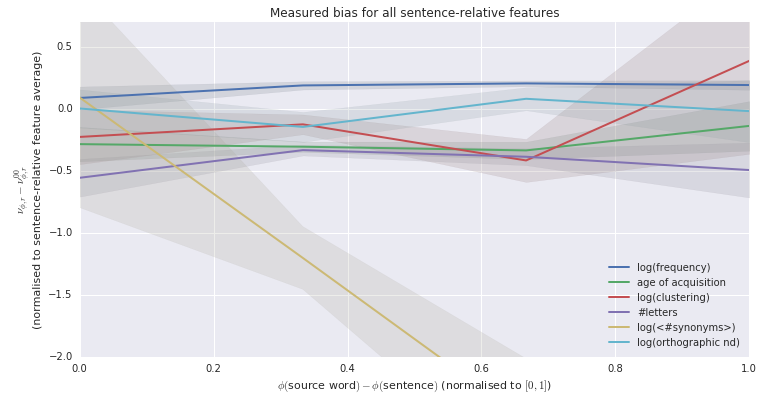

In [22]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_sentencerel',
             'deep', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True})\
    .set_ylim(-2, .7);

#### 2.2.2 Quantiles of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | *   |
H_00 | ns. | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |
H_00 | *   | ns. | ns. | ns. |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | ns. | ns. | *** |
H_00 | ns. | *** | *** | *** |



-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | ns. | *** | **  |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | ns. | ns. | *** |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *   | *   | *** | *** |
H_00 | ns. | *   | ns. | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |



--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *** |
H_00 | ns. | ns. | ns. | ns. |


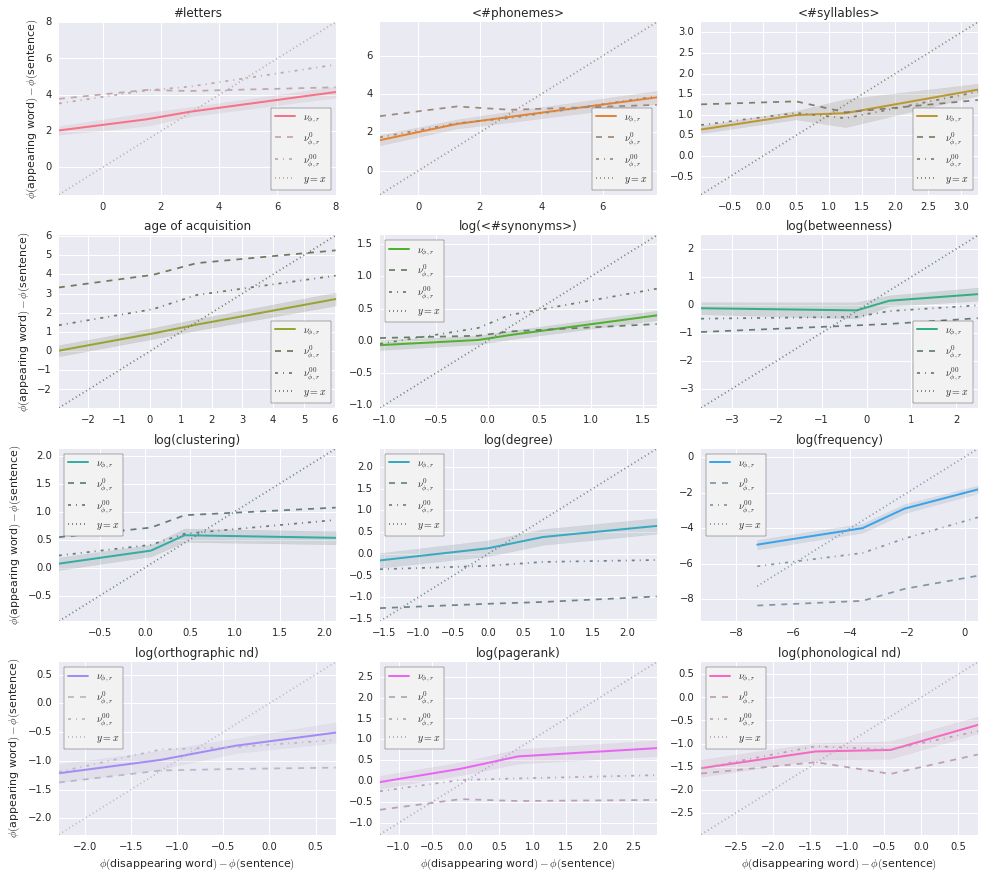

In [23]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

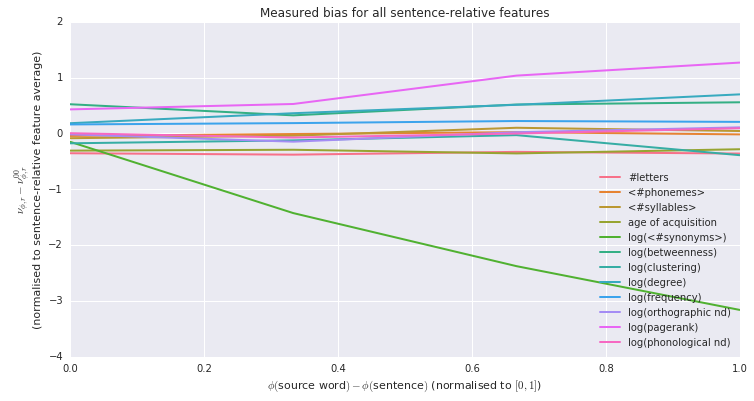

In [24]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | ns. | ns. | *** |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | **  | ns. | ns. | *** |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *   | *** | *** |
H_00 | ns. | *   | ns. | ns. |


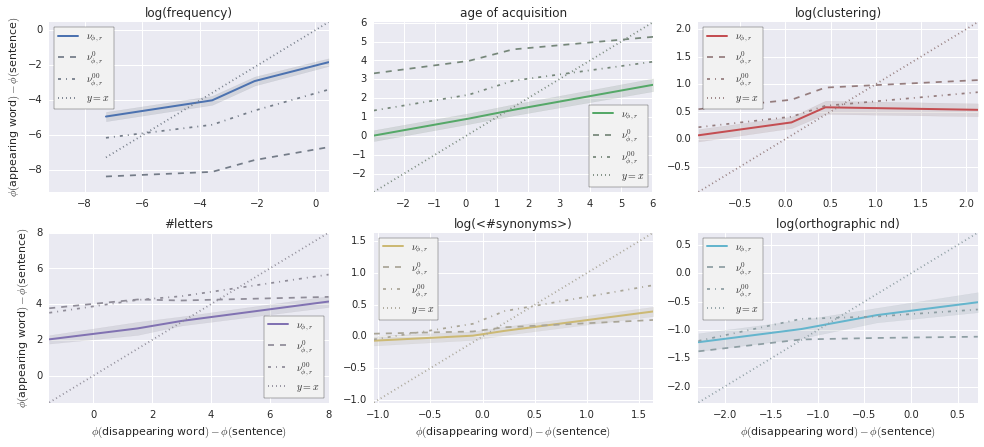

In [25]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

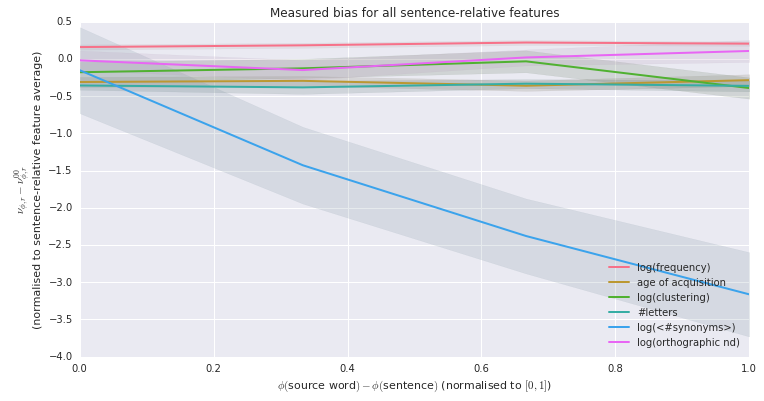

In [26]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True, 'quantiles': True});

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [27]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count,
                               right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count,
                               right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (
                dest[(x_bins == x) & (y_bins == y)] -
                source[(x_bins == x) & (y_bins == y)]
            ).mean()
            v_values[y, x] = (
                dest_rel[(x_bins == x) & (y_bins == y)] -
                source_rel[(x_bins == x) & (y_bins == y)]
            ).mean()
            strength[y, x] = np.sqrt(
                (dest[(x_bins == x) & (y_bins == y)] - 
                 source[(x_bins == x) & (y_bins == y)]) ** 2 +
                (dest_rel[(x_bins == x) & (y_bins == y)] - 
                 source_rel[(x_bins == x) & (y_bins == y)]) ** 2
            ).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), 
             label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


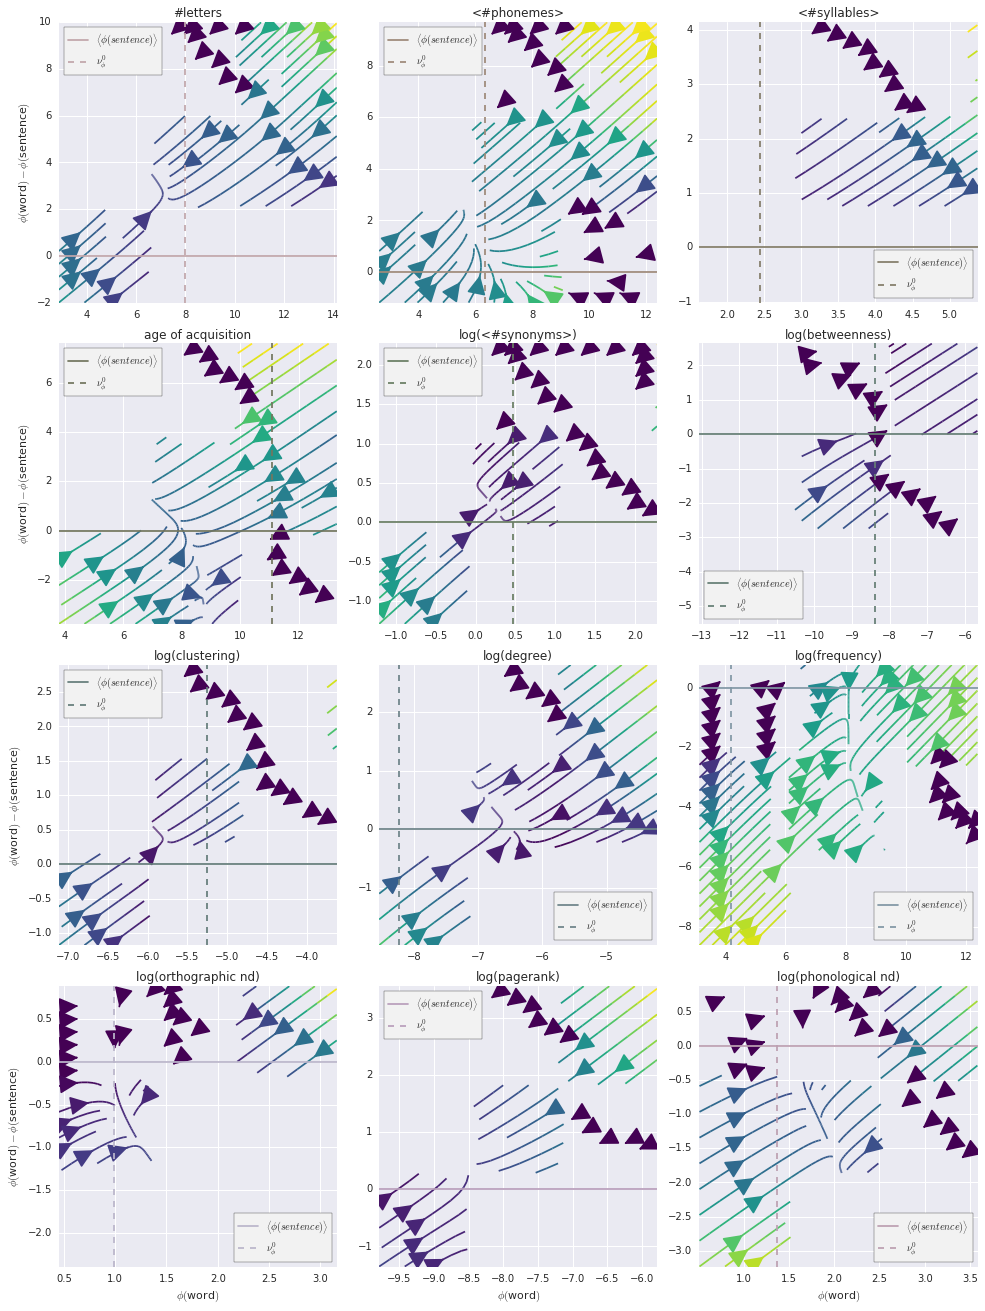

In [28]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


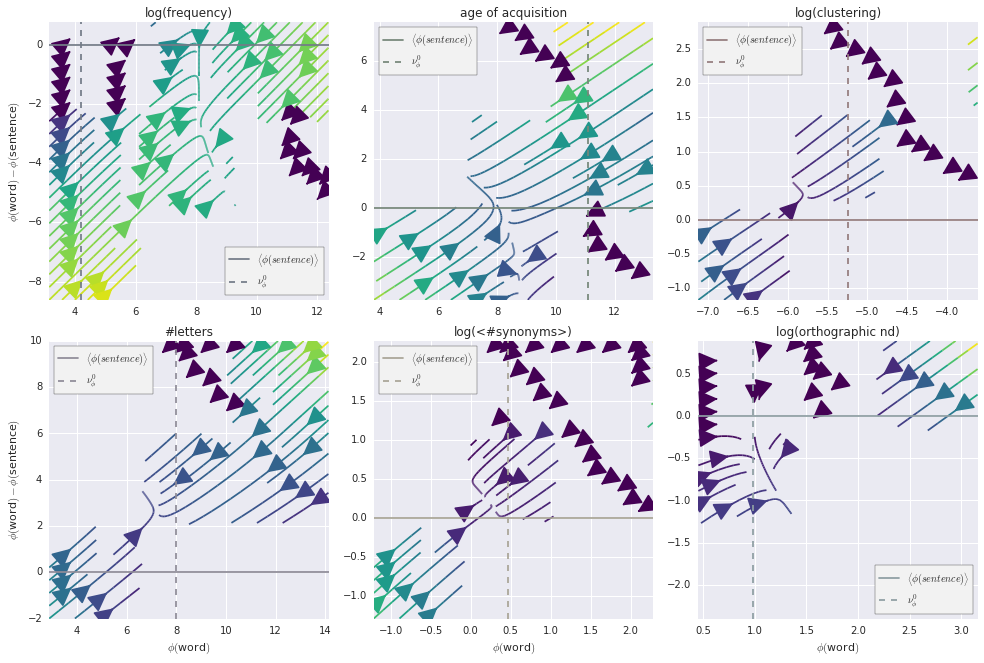

In [29]:
g = sb.FacetGrid(data=variations[variations['feature']
                                 .map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account, changing the values under the null hypotheses.

### 4.1 On all the features

Compute the actual PCA

In [30]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id',
                                 columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:"
      .format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 11 components.

Those explain the following variance:
[ 0.53320712  0.17207545  0.08660655  0.06916266  0.03472511  0.02820126
  0.01923263  0.01884692  0.01718276  0.0084874   0.00716216]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.452739,0.303477,-0.084487,0.241345,0.225124,-0.426287,0.241328,0.292942,-0.392105,0.291327,-0.149862,-0.003428
Component-1,0.280266,-0.417758,0.138758,-0.288747,-0.277323,-0.408413,0.172332,-0.299298,-0.432574,0.258819,-0.163807,0.019325
Component-2,-0.649400,-0.077016,0.118020,-0.052190,-0.728462,0.099367,0.017990,0.002987,0.059497,-0.077130,0.005896,0.072857


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [31]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution\
                .components(component, pca, pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (   0 of 1339) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  1% (  17 of 1339) |                       | Elapsed Time: 0:00:42 ETA: 1:12:24

  3% (  51 of 1339) |                       | Elapsed Time: 0:00:43 ETA: 0:19:15

  6% (  84 of 1339) |#                      | Elapsed Time: 0:00:43 ETA: 0:11:19

  8% ( 118 of 1339) |##                     | Elapsed Time: 0:00:43 ETA: 0:07:42

 11% ( 151 of 1339) |##                     | Elapsed Time: 0:00:43 ETA: 0:00:10

 13% ( 180 of 1339) |###                    | Elapsed Time: 0:00:44 ETA: 0:00:09

 15% ( 201 of 1339) |###                    | Elapsed Time: 0:00:44 ETA: 0:00:09

 17% ( 235 of 1339) |####                   | Elapsed Time: 0:00:44 ETA: 0:00:09

 20% ( 268 of 1339) |####                   | Elapsed Time: 0:00:44 ETA: 0:00:09

 22% ( 302 of 1339) |#####                  | Elapsed Time: 0:00:45 ETA: 0:00:08

 25% ( 335 of 1339) |#####                  | Elapsed Time: 0:00:45 ETA: 0:00:08

 27% ( 369 of 1339) |######                 | Elapsed Time: 0:00:45 ETA: 0:00:07

 30% ( 402 of 1339) |######                 | Elapsed Time: 0:00:45 ETA: 0:00:07

 32% ( 436 of 1339) |#######                | Elapsed Time: 0:00:46 ETA: 0:00:07

 35% ( 469 of 1339) |########               | Elapsed Time: 0:00:46 ETA: 0:00:07

 37% ( 503 of 1339) |########               | Elapsed Time: 0:00:46 ETA: 0:00:07

 40% ( 536 of 1339) |#########              | Elapsed Time: 0:00:47 ETA: 0:00:06

 42% ( 570 of 1339) |#########              | Elapsed Time: 0:00:47 ETA: 0:00:06

 45% ( 603 of 1339) |##########             | Elapsed Time: 0:00:47 ETA: 0:00:06

 47% ( 632 of 1339) |##########             | Elapsed Time: 0:00:47 ETA: 0:00:05

 48% ( 653 of 1339) |###########            | Elapsed Time: 0:00:48 ETA: 0:00:05

 51% ( 687 of 1339) |###########            | Elapsed Time: 0:00:48 ETA: 0:00:05

 53% ( 720 of 1339) |############           | Elapsed Time: 0:00:48 ETA: 0:00:04

 56% ( 754 of 1339) |############           | Elapsed Time: 0:00:48 ETA: 0:00:04

 58% ( 787 of 1339) |#############          | Elapsed Time: 0:00:49 ETA: 0:00:04

 61% ( 821 of 1339) |##############         | Elapsed Time: 0:00:49 ETA: 0:00:03

 63% ( 854 of 1339) |##############         | Elapsed Time: 0:00:49 ETA: 0:00:03

 66% ( 888 of 1339) |###############        | Elapsed Time: 0:00:49 ETA: 0:00:03

 68% ( 914 of 1339) |###############        | Elapsed Time: 0:00:50 ETA: 0:00:03

 70% ( 938 of 1339) |################       | Elapsed Time: 0:00:50 ETA: 0:00:03

 72% ( 971 of 1339) |################       | Elapsed Time: 0:00:50 ETA: 0:00:03

 75% (1005 of 1339) |#################      | Elapsed Time: 0:00:50 ETA: 0:00:02

 77% (1038 of 1339) |#################      | Elapsed Time: 0:00:51 ETA: 0:00:02

 80% (1072 of 1339) |##################     | Elapsed Time: 0:00:51 ETA: 0:00:02

 82% (1105 of 1339) |##################     | Elapsed Time: 0:00:51 ETA: 0:00:01

 84% (1134 of 1339) |###################    | Elapsed Time: 0:00:51 ETA: 0:00:01

 86% (1155 of 1339) |###################    | Elapsed Time: 0:00:52 ETA: 0:00:01

 88% (1189 of 1339) |####################   | Elapsed Time: 0:00:52 ETA: 0:00:01

 91% (1222 of 1339) |####################   | Elapsed Time: 0:00:52 ETA: 0:00:00

 93% (1248 of 1339) |#####################  | Elapsed Time: 0:00:52 ETA: 0:00:00

 95% (1273 of 1339) |#####################  | Elapsed Time: 0:00:53 ETA: 0:00:00

 97% (1306 of 1339) |###################### | Elapsed Time: 0:00:53 ETA: 0:00:00

100% (1339 of 1339) |######################| Elapsed Time: 0:00:53 Time: 0:00:53


Compute cluster averages (so as not to overestimate confidence intervals).

In [32]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | ns. | ns. | *   | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *   |

---
2.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | ns. |
H_00 | **  | ns. | **  | ns. |


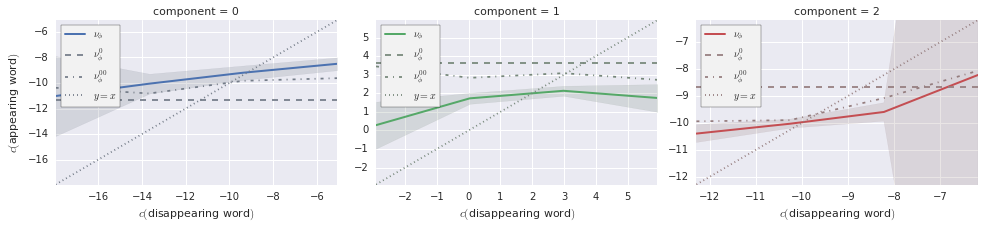

In [33]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On a subset of relevant features

In [34]:
relevant_features = ['frequency', 'aoa', 'letters_count']

Compute the actual PCA

In [35]:
# Compute the PCA.
pcafeatures = tuple(sorted(relevant_features))
pcavariations = variations[variations['feature']
                           .map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

pd.DataFrame(pca.components_,
             columns=pcafeatures,
             index=['Component-{}'.format(i)
                    for i in range(pca.n_components_)])

MLE estimates there are 2 components.

Those explain the following variance:
[ 0.67080117  0.18712907]



,aoa,frequency,letters_count
Component-0,-0.742691,0.361478,-0.563688
Component-1,0.455320,-0.344640,-0.820918


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [36]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(pca.n_components_):
            source, destination = substitution.components(component, pca,
                                                          pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (   0 of 1339) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  1% (  17 of 1339) |                       | Elapsed Time: 0:00:02 ETA: 0:03:42

  5% (  67 of 1339) |#                      | Elapsed Time: 0:00:03 ETA: 0:01:18

  7% ( 101 of 1339) |#                      | Elapsed Time: 0:00:03 ETA: 0:00:42

 10% ( 134 of 1339) |##                     | Elapsed Time: 0:00:03 ETA: 0:00:32

 12% ( 168 of 1339) |##                     | Elapsed Time: 0:00:03 ETA: 0:00:07

 15% ( 201 of 1339) |###                    | Elapsed Time: 0:00:04 ETA: 0:00:07

 17% ( 235 of 1339) |####                   | Elapsed Time: 0:00:04 ETA: 0:00:07

 20% ( 268 of 1339) |####                   | Elapsed Time: 0:00:04 ETA: 0:00:06

 22% ( 302 of 1339) |#####                  | Elapsed Time: 0:00:04 ETA: 0:00:06

 25% ( 335 of 1339) |#####                  | Elapsed Time: 0:00:04 ETA: 0:00:06

 27% ( 369 of 1339) |######                 | Elapsed Time: 0:00:05 ETA: 0:00:05

 30% ( 402 of 1339) |######                 | Elapsed Time: 0:00:05 ETA: 0:00:05

 32% ( 436 of 1339) |#######                | Elapsed Time: 0:00:05 ETA: 0:00:05

 35% ( 469 of 1339) |########               | Elapsed Time: 0:00:05 ETA: 0:00:05

 37% ( 503 of 1339) |########               | Elapsed Time: 0:00:05 ETA: 0:00:05

 40% ( 536 of 1339) |#########              | Elapsed Time: 0:00:06 ETA: 0:00:05

 42% ( 570 of 1339) |#########              | Elapsed Time: 0:00:06 ETA: 0:00:04

 45% ( 603 of 1339) |##########             | Elapsed Time: 0:00:06 ETA: 0:00:04

 47% ( 637 of 1339) |##########             | Elapsed Time: 0:00:06 ETA: 0:00:04

 51% ( 687 of 1339) |###########            | Elapsed Time: 0:00:07 ETA: 0:00:04

 55% ( 737 of 1339) |############           | Elapsed Time: 0:00:07 ETA: 0:00:03

 57% ( 770 of 1339) |#############          | Elapsed Time: 0:00:07 ETA: 0:00:03

 60% ( 804 of 1339) |#############          | Elapsed Time: 0:00:07 ETA: 0:00:03

 63% ( 854 of 1339) |##############         | Elapsed Time: 0:00:08 ETA: 0:00:02

 67% ( 904 of 1339) |###############        | Elapsed Time: 0:00:08 ETA: 0:00:02

 70% ( 938 of 1339) |################       | Elapsed Time: 0:00:08 ETA: 0:00:02

 73% ( 988 of 1339) |################       | Elapsed Time: 0:00:08 ETA: 0:00:02

 77% (1038 of 1339) |#################      | Elapsed Time: 0:00:09 ETA: 0:00:01

 81% (1088 of 1339) |##################     | Elapsed Time: 0:00:09 ETA: 0:00:01

 83% (1122 of 1339) |###################    | Elapsed Time: 0:00:09 ETA: 0:00:01

 87% (1172 of 1339) |####################   | Elapsed Time: 0:00:09 ETA: 0:00:00

 91% (1222 of 1339) |####################   | Elapsed Time: 0:00:10 ETA: 0:00:00

 93% (1256 of 1339) |#####################  | Elapsed Time: 0:00:10 ETA: 0:00:00

 97% (1306 of 1339) |###################### | Elapsed Time: 0:00:10 ETA: 0:00:00

100% (1339 of 1339) |######################| Elapsed Time: 0:00:10 Time: 0:00:10


Compute cluster averages (so as not to overestimate confidence intervals).

In [37]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |


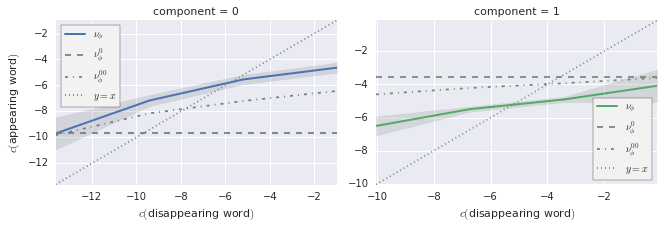

In [38]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `relevant_features`). So note the following:

In [39]:
for feature in relevant_features:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution
                               ._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature)
                 for feature in relevant_features]:
    words.update(tfeature())

data = dict((feature, []) for feature in relevant_features)
words_list = []
for word in words:
    words_list.append(word)
    for feature in relevant_features:
        data[feature].append(Substitution
                             ._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, "
      "only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, "
      "but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'letters_count' is based on 42786 words.



Among all the set of words used by these features, only 14450 are used.

Similarly, we mined 1202 (cluster-unique) substitutions, but the PCA is in fact computed on 946 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.

## 5 Interactions between features (by Anova)

Some useful variables first.

In [40]:
cuts = [('fixed bins', pd.cut)]#, ('quantiles', pd.qcut)]
rels = [('global', ''), ('sentence-relative', '_rel')]

def star_level(p):
    if p < .001:
        return '***'
    elif p < .01:
        return ' **'
    elif p < .05:
        return '  *'
    else:
        return 'ns.'

Now for each feature, assess if it has an interaction with the other features' **destination value**. We look at this for all pairs of features, with all pairs of global/sentence-relative value and types of binning (fixed width/quantiles). So it's a lot of answers.

Three stars means $p < .001$, two $p < .01$, one $p < .05$, and `ns.` means non-significative.

In [41]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
    * global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
   ** global -> sentence-relative


  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
    * global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global


   ** sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
   ** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative


   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
    * sentence-relative -> global


   ** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
    * global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> aoa
   ** global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
    * global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  *** global -> global


  ns. global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
   ** global -> global


   ** global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> aoa


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
    * global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  ns. global -> sentence-relative
  *** sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
    * global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


   ** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Now for each feature, look at its interaction with the other features' **variation (i.e. destination - source)**. Same drill, same combinations.

In [42]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]\
                    - variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency


  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


  *** global -> global


  *** global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


  *** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency


  *** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
   ** global -> global


   ** global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


    * global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
    * global -> global


  ns. global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  ns. global -> global


    * global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> letters_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


  *** global -> global
   ** global -> sentence-relative
    * sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Ok, so this can go on for a long time, and I'm not going to look at interactions with this lens (meaning at interaction of couples of features with another feature's destination values).

## 6 Regression

In [43]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [44]:
rels = {False: ('global', ''),
        True: ('rel', '_rel')}

def regress(data, features, target,
            source_rel=False, dest_rel=False, interactions=False):
    if source_rel not in [True, False, 'both']:
        raise ValueError
    if not isinstance(dest_rel, bool):
        raise ValueError
    # Process source/destination relativeness arguments.
    if isinstance(source_rel, bool):
        source_rel = [source_rel]
    else:
        source_rel = [False, True]
    dest_rel_name, dest_rel = rels[dest_rel]
    
    features = tuple(sorted(features))
    feature_tuples = [('source' + rels[rel][1], feature)
                      for rel in source_rel
                      for feature in features]
    feature_names = [rels[rel][0] + '_' + feature
                     for rel in source_rel
                     for feature in features]
    
    # Get source and destination values.
    source = pd.pivot_table(
        data,
        values=['source' + rels[rel][1] for rel in source_rel],
        index=['cluster_id'],
        columns=['feature']
    )[feature_tuples].dropna()
    destination = variations[variations.feature == target]\
        .pivot(index='cluster_id', columns='feature',
               values='destination' + dest_rel)\
        .loc[source.index][target].dropna()
    source = source.loc[destination.index].values
    destination = destination.values

    # If asked to, get polynomial features.
    if interactions:
        poly = PolynomialFeatures(degree=2, interaction_only=True)
        source = poly.fit_transform(source)
        regress_features = [' * '.join([feature_names[j]
                                        for j, p in enumerate(powers)
                                        if p > 0]) or 'intercept'
                            for powers in poly.powers_]
    else:
        regress_features = feature_names

    # Regress.
    linreg = linear_model.LinearRegression(fit_intercept=not interactions)
    linreg.fit(source, destination)

    # And print the score and coefficients.
    print('Regressing {} with {} measures, {} interactions'
          .format(dest_rel_name + ' ' + target, len(source),
                  'with' if interactions else 'no'))
    print('           ' + '^' * len(dest_rel_name + ' ' + target))
    print('R^2 = {}'
          .format(linreg.score(source, destination)))
    print()
    coeffs = pd.Series(index=regress_features, data=linreg.coef_)
    if not interactions:
        coeffs = pd.Series(index=['intercept'], data=[linreg.intercept_])\
            .append(coeffs)
    with pd.option_context('display.max_rows', 999):
        print(coeffs)

In [45]:
for target in PAPER_FEATURES:
    print('-' * 70)
    for source_rel, dest_rel in product([False, True, 'both'],
                                        [False, True]):
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel)
        print()
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel, interactions=True)
        print()

----------------------------------------------------------------------
Regressing global frequency with 682 measures, no interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.057351369132081616

intercept                      5.148375
global_aoa                     0.036491
global_clustering             -0.084663
global_frequency               0.316077
global_letters_count          -0.009004
global_orthographic_density   -0.050470
global_synonyms_count          0.001106
dtype: float64

Regressing global frequency with 682 measures, with interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.07229490977250796

intercept                                              5.381044
global_aoa                                             0.257646
global_clustering                                      0.766508
global_frequency                                       0.812318
global_letters_count                                  -0.472796
global_orthographic_density                            0.830475
global_syn

Regressing rel frequency with 682 measures, no interactions
           ^^^^^^^^^^^^^
R^2 = 0.229122849534243

intercept                  -1.678934
rel_aoa                     0.036116
rel_clustering              0.126170
rel_frequency               0.624868
rel_letters_count          -0.110558
rel_orthographic_density   -0.200695
rel_synonyms_count         -0.006214
dtype: float64

Regressing rel frequency with 682 measures, with interactions
           ^^^^^^^^^^^^^
R^2 = 0.25107276611884943

intercept                                       -1.896473
rel_aoa                                         -0.019989
rel_clustering                                   0.181190
rel_frequency                                    0.560604
rel_letters_count                                0.002630
rel_orthographic_density                        -0.319727
rel_synonyms_count                               0.232824
rel_aoa * rel_clustering                        -0.010550
rel_aoa * rel_frequency              

Regressing global aoa with 625 measures, no interactions
           ^^^^^^^^^^
R^2 = 0.05900835937179594

intercept                      7.152716
global_aoa                     0.162955
global_clustering              0.121683
global_frequency              -0.096384
global_letters_count           0.093025
global_orthographic_density   -0.007571
global_synonyms_count         -0.277976
dtype: float64

Regressing global aoa with 625 measures, with interactions
           ^^^^^^^^^^
R^2 = 0.09359051714618716

intercept                                             -2.311086
global_aoa                                             0.127713
global_clustering                                     -1.590173
global_frequency                                       0.259600
global_letters_count                                   1.381944
global_orthographic_density                            0.152900
global_synonyms_count                                 -4.321143
global_aoa * global_clustering            

intercept                   0.721686
rel_aoa                     0.422031
rel_clustering             -0.047113
rel_frequency              -0.103615
rel_letters_count           0.023596
rel_orthographic_density    0.207888
rel_synonyms_count         -0.210760
dtype: float64

Regressing rel aoa with 625 measures, with interactions
           ^^^^^^^
R^2 = 0.16698133021975828

intercept                                        1.016641
rel_aoa                                          0.483313
rel_clustering                                  -0.421473
rel_frequency                                   -0.015028
rel_letters_count                               -0.002357
rel_orthographic_density                         0.369442
rel_synonyms_count                              -0.254484
rel_aoa * rel_clustering                        -0.047379
rel_aoa * rel_frequency                          0.030616
rel_aoa * rel_letters_count                      0.017889
rel_aoa * rel_orthographic_density         

Regressing global clustering with 537 measures, no interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.030355880941795532

intercept                     -5.201199
global_aoa                     0.015189
global_clustering              0.090541
global_frequency              -0.044152
global_letters_count           0.027028
global_orthographic_density    0.071590
global_synonyms_count          0.008820
dtype: float64

Regressing global clustering with 537 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.07553598658094474

intercept                                             -6.329461
global_aoa                                             0.211961
global_clustering                                      0.141477
global_frequency                                      -0.369460
global_letters_count                                   0.564472
global_orthographic_density                            1.143834
global_synonyms_count                                 -0.328208
global_aoa * 

Regressing rel clustering with 537 measures, with interactions
           ^^^^^^^^^^^^^^
R^2 = 0.11974863950748092

intercept                                        0.273223
rel_aoa                                         -0.018479
rel_clustering                                   0.211999
rel_frequency                                   -0.015736
rel_letters_count                                0.036351
rel_orthographic_density                         0.106489
rel_synonyms_count                               0.026009
rel_aoa * rel_clustering                         0.017814
rel_aoa * rel_frequency                         -0.007726
rel_aoa * rel_letters_count                     -0.014961
rel_aoa * rel_orthographic_density              -0.029422
rel_aoa * rel_synonyms_count                    -0.016009
rel_clustering * rel_frequency                  -0.025739
rel_clustering * rel_letters_count               0.030813
rel_clustering * rel_orthographic_density        0.033200
rel_clustering

Regressing global letters_count with 682 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.08909374727616026

intercept                                             -11.629282
global_aoa                                              0.689290
global_clustering                                      -3.339435
global_frequency                                        0.659258
global_letters_count                                    0.784238
global_orthographic_density                            -0.824194
global_synonyms_count                                   0.965234
global_aoa * global_clustering                          0.185551
global_aoa * global_frequency                           0.050047
global_aoa * global_letters_count                      -0.008668
global_aoa * global_orthographic_density                0.052871
global_aoa * global_synonyms_count                     -0.076678
global_clustering * global_frequency                    0.170373
global_clustering * global_

Regressing rel letters_count with 682 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.1419094491432853

intercept                                        1.710703
rel_aoa                                          0.062885
rel_clustering                                  -0.029275
rel_frequency                                   -0.055571
rel_letters_count                                0.507540
rel_orthographic_density                         0.127012
rel_synonyms_count                              -0.378007
rel_aoa * rel_clustering                         0.118752
rel_aoa * rel_frequency                          0.012953
rel_aoa * rel_letters_count                     -0.111374
rel_aoa * rel_orthographic_density              -0.154347
rel_aoa * rel_synonyms_count                    -0.214907
rel_clustering * rel_frequency                  -0.000114
rel_clustering * rel_letters_count               0.071890
rel_clustering * rel_orthographic_density        0.224349
rel_clust

Regressing global synonyms_count with 658 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.03198114621878323

intercept                                              0.982956
global_aoa                                             0.159613
global_clustering                                      0.339560
global_frequency                                      -0.068185
global_letters_count                                   0.059374
global_orthographic_density                            0.029413
global_synonyms_count                                 -0.351833
global_aoa * global_clustering                         0.011221
global_aoa * global_frequency                         -0.003568
global_aoa * global_letters_count                     -0.011578
global_aoa * global_orthographic_density               0.003957
global_aoa * global_synonyms_count                     0.030026
global_clustering * global_frequency                  -0.027679
global_clustering * global_letters_cou

Regressing rel synonyms_count with 658 measures, with interactions
           ^^^^^^^^^^^^^^^^^^
R^2 = 0.08636508428493084

intercept                                        0.134887
rel_aoa                                         -0.006392
rel_clustering                                  -0.089921
rel_frequency                                    0.036770
rel_letters_count                               -0.003998
rel_orthographic_density                         0.065835
rel_synonyms_count                               0.383807
rel_aoa * rel_clustering                         0.011908
rel_aoa * rel_frequency                         -0.001567
rel_aoa * rel_letters_count                     -0.000812
rel_aoa * rel_orthographic_density               0.007183
rel_aoa * rel_synonyms_count                    -0.001171
rel_clustering * rel_frequency                  -0.037542
rel_clustering * rel_letters_count               0.001424
rel_clustering * rel_orthographic_density       -0.010324
rel_cl

Regressing global orthographic_density with 537 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.07766466684642903

intercept                                              6.527974
global_aoa                                            -0.414313
global_clustering                                      0.711932
global_frequency                                      -0.121278
global_letters_count                                  -0.360124
global_orthographic_density                            0.016747
global_synonyms_count                                  0.585387
global_aoa * global_clustering                        -0.017207
global_aoa * global_frequency                          0.018698
global_aoa * global_letters_count                      0.009159
global_aoa * global_orthographic_density               0.050745
global_aoa * global_synonyms_count                     0.011625
global_clustering * global_frequency                  -0.020074
global_clustering * global

Regressing global orthographic_density with 537 measures, no interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.06876915673653672

intercept                      2.879508
global_aoa                    -0.077098
global_clustering              0.061148
global_frequency              -0.066085
global_letters_count          -0.075947
global_orthographic_density    0.252385
global_synonyms_count         -0.020472
rel_aoa                        0.072190
rel_clustering                -0.045218
rel_frequency                  0.066677
rel_letters_count              0.010221
rel_orthographic_density      -0.183216
rel_synonyms_count             0.079020
dtype: float64

Regressing global orthographic_density with 537 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.17481056478171408

intercept                                                -1.234056
global_aoa                                               -0.442375
global_clustering                               